In [1]:
import numpy as np
from pathlib import Path
import lmdb
import six
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import japanize_matplotlib
import json
import cv2
from pprint import pprint

In [2]:
ROOT_DIR = Path('../../../')
DATA_DIR = ROOT_DIR / 'extra_data/ICPR2022_CHARTINFO_UB_PMC_TRAIN_v1.0'
IMG_DIR = DATA_DIR / 'images'
ANN_DIR = DATA_DIR / 'annotations_JSON'

CHART_TYPES = [
    'scatter',
    'line',
    'vertical_bar',
    'horizontal_bar',
    'scatter-line'
]
sample_name = 'scatter/PMC1173101___1471-2156-6-30-3'
sample_img_path = IMG_DIR / f'{sample_name}.jpg'
sample_ann_path = ANN_DIR / f'{sample_name}.json'

# check sample

In [3]:
sample_img = cv2.imread(str(sample_img_path))[:, :, ::-1]
with open(str(sample_ann_path), 'r') as f:
    sample_ann = json.load(f)

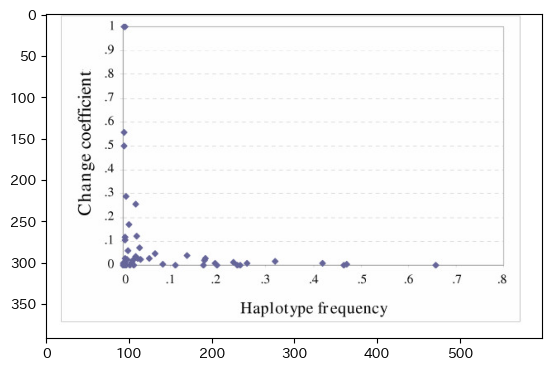

In [4]:
plt.imshow(sample_img)

In [5]:
sample_ann['task6']['output']['data series']

[{'data': [{'x': -0.001328951644938787, 'y': 0.006622897949781223},
   {'x': 0.0028312448087825987, 'y': 0.030580511402903035},
   {'x': 0.013231735943086163, 'y': 0.012151577977425096},
   {'x': 0.02085876277490881, 'y': 0.006622897949781223},
   {'x': 0.019356469611064974, 'y': 0.02390002303616685},
   {'x': 0.02571232530425049, 'y': 0.035648468094909194},
   {'x': 0.03611281643855405, 'y': 0.027355448053443976},
   {'x': 0.008378173413744553, 'y': 0.0632918682331262},
   {'x': 0.0028312448087825987, 'y': 0.10890347846118462},
   {'x': 0.003524610884402871, 'y': 0.12272517853029313},
   {'x': 0.010458271640605246, 'y': 0.17248329877908342},
   {'x': 0.026405691379870713, 'y': 0.12687168855102526},
   {'x': 0.03333935213607309, 'y': 0.07573139829532374},
   {'x': 0.05333140731645655, 'y': 0.03150195807417668},
   {'x': 0.06696760680365457, 'y': 0.052004146510020784},
   {'x': 0.08187497742948972, 'y': 0.008005067956692192},
   {'x': 0.10752952222743853, 'y': 0.0010942179221379398},
  

In [62]:
single_data_ids = {}

for chart_type in CHART_TYPES:
    img_chart_dir = IMG_DIR / chart_type
    ann_chart_dir = ANN_DIR / chart_type
    
    single_data_ids[chart_type] = []

    img_path_list = list(img_chart_dir.glob('*.jpg'))

    pbar = tqdm(img_path_list, total=len(img_path_list))

    for img_path in img_path_list:
        id_ = img_path.stem
        json_path = ann_chart_dir / f'{id_}.json'
        with open(str(json_path), 'r') as f:
            ann = json.load(f)
        if 'task6' not in ann or ann['task6'] is None:
            continue
        if len(ann['task6']['output']['data series']) != 1:
            continue
        single_data_ids[chart_type].append(id_)
    

0it [00:11, ?it/s]
  0%|          | 0/787 [00:00<?, ?it/s]


In [64]:
for k, v in single_data_ids.items():
    print(f'{k}: {len(v)}')

scatter: 138
line: 273
vertical_bar: 478
horizontal_bar: 218
scatter-line: 0
